# Feature Selection in Heart Disease Prediction

In [31]:
# import packages 
import pandas as pd 
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
from featurewiz import featurewiz
np.random.seed(1234)

# Load the Heart Disease dataset.

In [3]:
data = pd.read_csv('bheart.csv') 
data.shape

(1025, 14)

# Split the data into independent features and target.

In [4]:
X = data.drop(['target'],axis=1)
 
y = data.target.values 

# Standardize the features by using StandardScaler from scikit-learn

In [5]:
X_scaled =  StandardScaler().fit_transform(X) 


In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled,y,test_size = 0.2,stratify=y, random_state=1)

In [7]:
classifier = RandomForestClassifier()
 
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [8]:
# make prediction 
preds = classifier.predict(X_valid) 
# check performance
accuracy_score(preds,y_valid) 

1.0

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Correlation Limit = 0.7
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Binary_Classification problem ####
    Loaded train data. Shape = (1025, 14)
#### Single_Label Binary_Classification problem ####
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
        No variables were

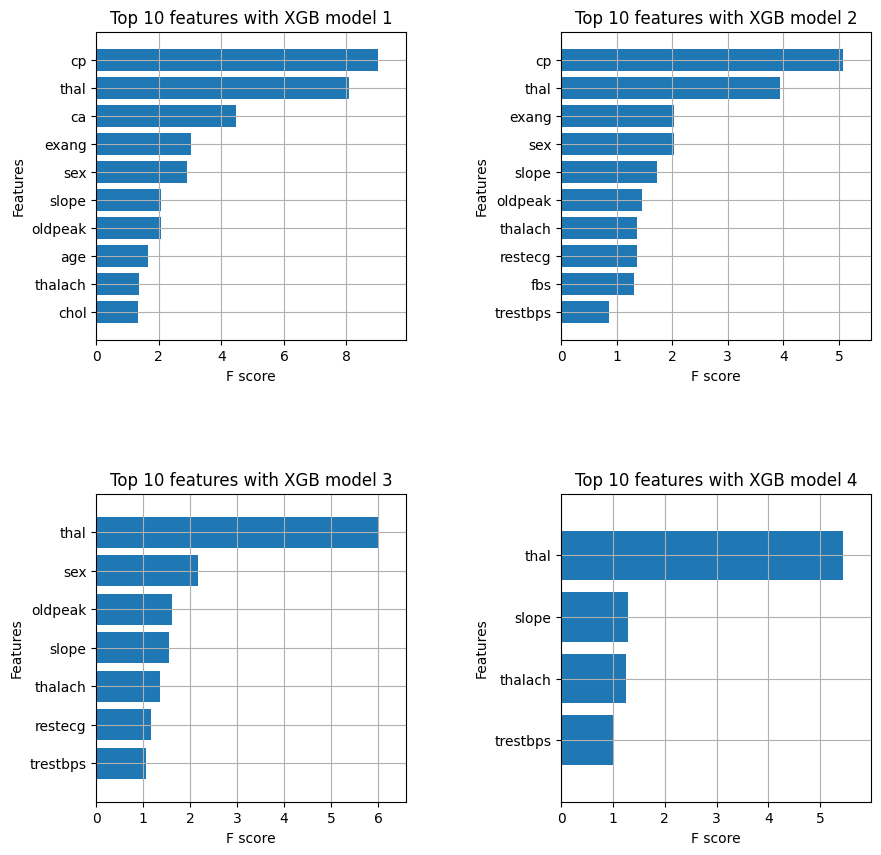

    Completed XGBoost feature selection in 1 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 6 important features:
['cp', 'thal', 'ca', 'exang', 'sex', 'oldpeak']
Total Time taken for featurewiz selection = 2 seconds
Output contains a list of 6 important features and a train dataframe


In [9]:
# automatic feature selection by using featurewiz package
target = 'target'
 
features, train = featurewiz(data, target, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

As you can see, Featurewiz selects 16 important features from the dataset. The Featurewiz instance returns two objects 

Features - a list of selected features
One dataframe - This dataframe contains only selected features and the target variable.
Now you can train the RandomForestClassifier again with selected features and see if the model performance will improve.

Let see the list of selected features.

In [10]:
print(features)


['cp', 'thal', 'ca', 'exang', 'sex', 'oldpeak']


In [11]:
#split data into feature and target
X_new = train.drop(['target'],axis=1)
 
y = train.target.values 

In [12]:
# preprocessing the features 
X_scaled =  StandardScaler().fit_transform(X_new)

In [13]:
#split data into train and validate 
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled,y,test_size = 0.2,stratify=y, random_state=1)

In [14]:
# create and train classifier 
classifier = RandomForestClassifier()
 
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [15]:
# make prediction 
preds = classifier.predict(X_valid) 
# check performance
accuracy_score(preds,y_valid) 

0.9560975609756097

In [16]:
import pandas as pd
import pickle

In [17]:
new_data = pd.DataFrame({
    'cp' : 0,
    'thal':3,
    'ca':2,
    'exang':0,
    'sex' : 0,
    'oldpeak':1.0,
},index=[0])

In [18]:
new_data


,cp,thal,ca,exang,sex,oldpeak
0,0,3,2,0,0,1.0


In [19]:
p = classifier.predict(new_data) 

In [20]:
if p[0] ==0:
    print("No Disease")
else:
    print("Disease")

No Disease


In [21]:
filename = 'My_featured_disease_model'

In [23]:
pickle.dump(classifier,open(filename,'wb'))

In [24]:
loaded_model = pickle.load(open(filename,'rb'))

In [25]:
loaded_model.predict(new_data)

array([0])

In [26]:
import joblib

In [27]:
joblib.dump(classifier,'model_joblib_heart')

['model_joblib_heart']

In [28]:
model = joblib.load('model_joblib_heart')

In [29]:
model.predict(new_data)

array([0])

https://hackernoon.com/automatic-feature-selection-in-python-an-essential-guide-uv3e37mk